In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import datetime
import operator
plt.style.use('seaborn')

%matplotlib inline


In [2]:
# loading all 3 datasets

confirmed_cases = pd.read_csv('/Users/shivaneeprajapati/Desktop/TakenMind/Spotle.ai/COVID/time_series_covid19_confirmed_global.csv')

deaths_reported = pd.read_csv('/Users/shivaneeprajapati/Desktop/TakenMind/Spotle.ai/COVID/time_series_covid19_deaths_global.csv')

recovered_cases = pd.read_csv('/Users/shivaneeprajapati/Desktop/TakenMind/Spotle.ai/COVID/time_series_covid19_recovered_global.csv')

In [3]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,349,367,423,444,484,521,555,607,665,714
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,361,377,383,400,409,416,433,446,467,475
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,501,525,545,564,583,601,601,638,646,659
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,14,16,17,19,19,19,19,19,19,19


In [4]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,7,11,14,14,15,15,18,18,21,23
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,20,21,22,22,23,23,23,23,23,24
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,152,173,193,205,235,256,275,293,313,326
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,18,21,22,23,25,26,26,29,29,31
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [5]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,15,18,18,29,32,32,32,32,32,40
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,104,116,131,154,165,182,197,217,232,248
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,90,90,113,237,347,405,460,591,601,691
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,26,31,39,52,58,71,71,128,128,128
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,4,4,4,5


In [6]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

In [7]:
# taking only columns which has confirmed cases 
confirmed = confirmed_cases.loc[:,cols[4]:cols[-1]]

In [8]:
deaths = deaths_reported.loc[:,cols[4]:cols[-1]]

In [9]:
recovered = recovered_cases.loc[:,cols[4]:cols[-1]]

In [10]:
# check the head of the outbreak head data
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20
0,0,0,0,0,0,0,0,0,0,0,...,349,367,423,444,484,521,555,607,665,714
1,0,0,0,0,0,0,0,0,0,0,...,361,377,383,400,409,416,433,446,467,475
2,0,0,0,0,0,0,0,0,0,0,...,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070
3,0,0,0,0,0,0,0,0,0,0,...,501,525,545,564,583,601,601,638,646,659
4,0,0,0,0,0,0,0,0,0,0,...,14,16,17,19,19,19,19,19,19,19


In [11]:
# find total confirmed , death and recoverd cases and append them in list 
# find mortality rate - death/confirmed

dates = confirmed.keys()
world_cases = []
total_deaths = []
total_recovered = []
mortality_rate = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recovered[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    mortality_rate.append(death_sum/death_sum)



In [12]:
# display all variables

print(confirmed_sum)
print(death_sum)
print(world_cases)

1976191
125984
[555, 654, 941, 1434, 2118, 2927, 5578, 6166, 8234, 9927, 12038, 16787, 19881, 23892, 27635, 30794, 34391, 37120, 40150, 42762, 44802, 45221, 60368, 66885, 69030, 71224, 73258, 75136, 75639, 76197, 76819, 78572, 78958, 79561, 80406, 81388, 82746, 84112, 86011, 88369, 90306, 92840, 95120, 97886, 101801, 105847, 109821, 113590, 118620, 125875, 128352, 145205, 156101, 167454, 181574, 197102, 214821, 242570, 272208, 304507, 336953, 378235, 418045, 467653, 529591, 593291, 660693, 720140, 782389, 857487, 932605, 1013466, 1095917, 1197408, 1272115, 1345101, 1426096, 1511104, 1595350, 1691719, 1771514, 1846679, 1917319, 1976191]


In [13]:
# convert dates and cases data to array

since_22_1 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

# display all arrays
print('since_22_1:', since_22_1)
print('world_cases'  , world_cases)
print('total_deaths',total_deaths)
print('total_recovered' ,total_recovered)

since_22_1: [[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]
 [64]
 [65]
 [66]
 [67]
 [68]
 [69]
 [70]
 [71]
 [72]
 [73]
 [74]
 [75]
 [76]
 [77]
 [78]
 [79]
 [80]
 [81]
 [82]
 [83]]
world_cases [[    555]
 [    654]
 [    941]
 [   1434]
 [   2118]
 [   2927]
 [   5578]
 [   6166]
 [   8234]
 [   9927]
 [  12038]
 [  16787]
 [  19881]
 [  23892]
 [  27635]
 [  30794]
 [  34391]
 [  37120]
 [  40150]
 [  42762]
 [  44802]
 [  45221]
 [  60368]
 [  66885]
 [  69030]
 [  71224]
 [  73258]
 [  75136]
 [  75639]
 [  76197]
 [  76819]
 [  78572]
 [  78958]
 [  79561]
 [  80406]
 [  81388]
 [  82746]
 [  84112]
 [  86011]
 [  88369]
 [  90306]
 [  92840]
 [  95120

In [14]:
# future forcasting

days_in_future = 10
futureforcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = futureforcast[:-10]
print(futureforcast)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]
 [64]
 [65]
 [66]
 [67]
 [68]
 [69]
 [70]
 [71]
 [72]
 [73]
 [74]
 [75]
 [76]
 [77]
 [78]
 [79]
 [80]
 [81]
 [82]
 [83]
 [84]
 [85]
 [86]
 [87]
 [88]
 [89]
 [90]
 [91]
 [92]
 [93]]


In [15]:
# convert all integers to ate time values

start = '1/22/2020'
start_date = datetime.datetime.strptime(start,'%m/%d/%Y')
future_forcast_dates = []
for i in range(len(futureforcast)):
    future_forcast_dates.append((start_date+datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
    
    

In [16]:
# for visualisation  with the latest data of date
latest_confirmed = confirmed_cases[dates[-1]]

latest_deaths = deaths_reported[dates[-1]]
latest_recovered = recovered_cases[dates[-1]]

In [17]:
print(latest_confirmed)
print(latest_deaths)
print(latest_recovered)

0       714
1       475
2      2070
3       659
4        19
       ... 
259       1
260       4
261       6
262       4
263       1
Name: 4/14/20, Length: 264, dtype: int64
0       23
1       24
2      326
3       31
4        2
      ... 
259      0
260      0
261      0
262      0
263      0
Name: 4/14/20, Length: 264, dtype: int64
0       40
1      248
2      691
3      128
4        5
      ... 
245      0
246      0
247      0
248      0
249      0
Name: 4/14/20, Length: 250, dtype: int64


In [18]:
unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'

In [19]:
# calculate total no of cases by each country

country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases >0:
        country_confirmed_cases.append(i)
    else:
        no_cases.append(i)
    
for i in no_cases:
    unique_countries.remove(i)

unique_countries=[k for k,v in sorted(zip(unique_countries,country_confirmed_cases),key=operator.itemgetter(1),reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i]=latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()
print(unique_countries)

['Zimbabwe', 'Zambia', 'Yemen', 'Western Sahara', 'West Bank and Gaza', 'Vietnam', 'Venezuela', 'Uzbekistan', 'Uruguay', 'United Kingdom', 'United Arab Emirates', 'Ukraine', 'Uganda', 'US', 'Turkey', 'Tunisia', 'Trinidad and Tobago', 'Togo', 'Timor-Leste', 'Thailand', 'Tanzania', 'Taiwan*', 'Syria', 'Switzerland', 'Sweden', 'Suriname', 'Sudan', 'Sri Lanka', 'Spain', 'South Sudan', 'South Africa', 'Somalia', 'Slovenia', 'Slovakia', 'Singapore', 'Sierra Leone', 'Seychelles', 'Serbia', 'Senegal', 'Saudi Arabia', 'Sao Tome and Principe', 'San Marino', 'Saint Vincent and the Grenadines', 'Saint Lucia', 'Saint Kitts and Nevis', 'Rwanda', 'Russia', 'Romania', 'Qatar', 'Portugal', 'Poland', 'Philippines', 'Peru', 'Paraguay', 'Papua New Guinea', 'Panama', 'Pakistan', 'Oman', 'Norway', 'North Macedonia', 'Nigeria', 'Niger', 'Nicaragua', 'New Zealand', 'Netherlands', 'Nepal', 'Namibia', 'Mozambique', 'Morocco', 'Montenegro', 'Mongolia', 'Monaco', 'Moldova', 'Mexico', 'Mauritius', 'Mauritania', 'M

In [20]:
# num of cases per country

print('confirmed cases by country/region :')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}:{country_confirmed_cases[i]}   cases')

confirmed cases by country/region :
Zimbabwe:17   cases
Zambia:45   cases
Yemen:1   cases
Western Sahara:6   cases
West Bank and Gaza:308   cases
Vietnam:266   cases
Venezuela:189   cases
Uzbekistan:1165   cases
Uruguay:483   cases
United Kingdom:94845   cases
United Arab Emirates:4933   cases
Ukraine:3372   cases
Uganda:55   cases
US:607670   cases
Turkey:65111   cases
Tunisia:747   cases
Trinidad and Tobago:113   cases
Togo:77   cases
Timor-Leste:6   cases
Thailand:2613   cases
Tanzania:53   cases
Taiwan*:393   cases
Syria:29   cases
Switzerland:25936   cases
Sweden:11445   cases
Suriname:10   cases
Sudan:32   cases
Sri Lanka:233   cases
Spain:172541   cases
South Sudan:4   cases
South Africa:2415   cases
Somalia:60   cases
Slovenia:1220   cases
Slovakia:835   cases
Singapore:3252   cases
Sierra Leone:11   cases
Seychelles:11   cases
Serbia:4465   cases
Senegal:299   cases
Saudi Arabia:5369   cases
Sao Tome and Principe:4   cases
San Marino:371   cases
Saint Vincent and the Grenadine

In [21]:
#  Plot bar graph to see total confirmed cas in india and outside india other countries


India_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='India'].sum()
China_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='China'].sum()


outside_india = np.sum(country_confirmed_cases)-India_confirmed

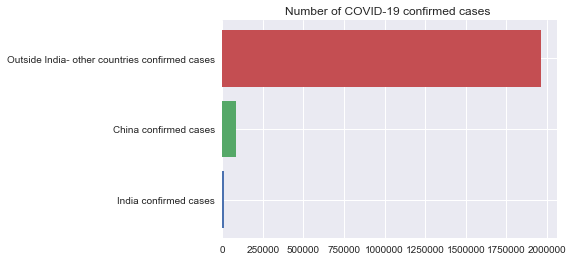

In [22]:
plt.barh('India confirmed cases',India_confirmed)
plt.barh('China confirmed cases',China_confirmed)


plt.barh('Outside India- other countries confirmed cases' ,outside_india)

                       
plt.title('Number of COVID-19 confirmed cases ')

plt.show()

In [30]:
confirmed_India_cases = confirmed.loc[131:131,:] 
confirmed_India_cases = confirmed_India_cases.T

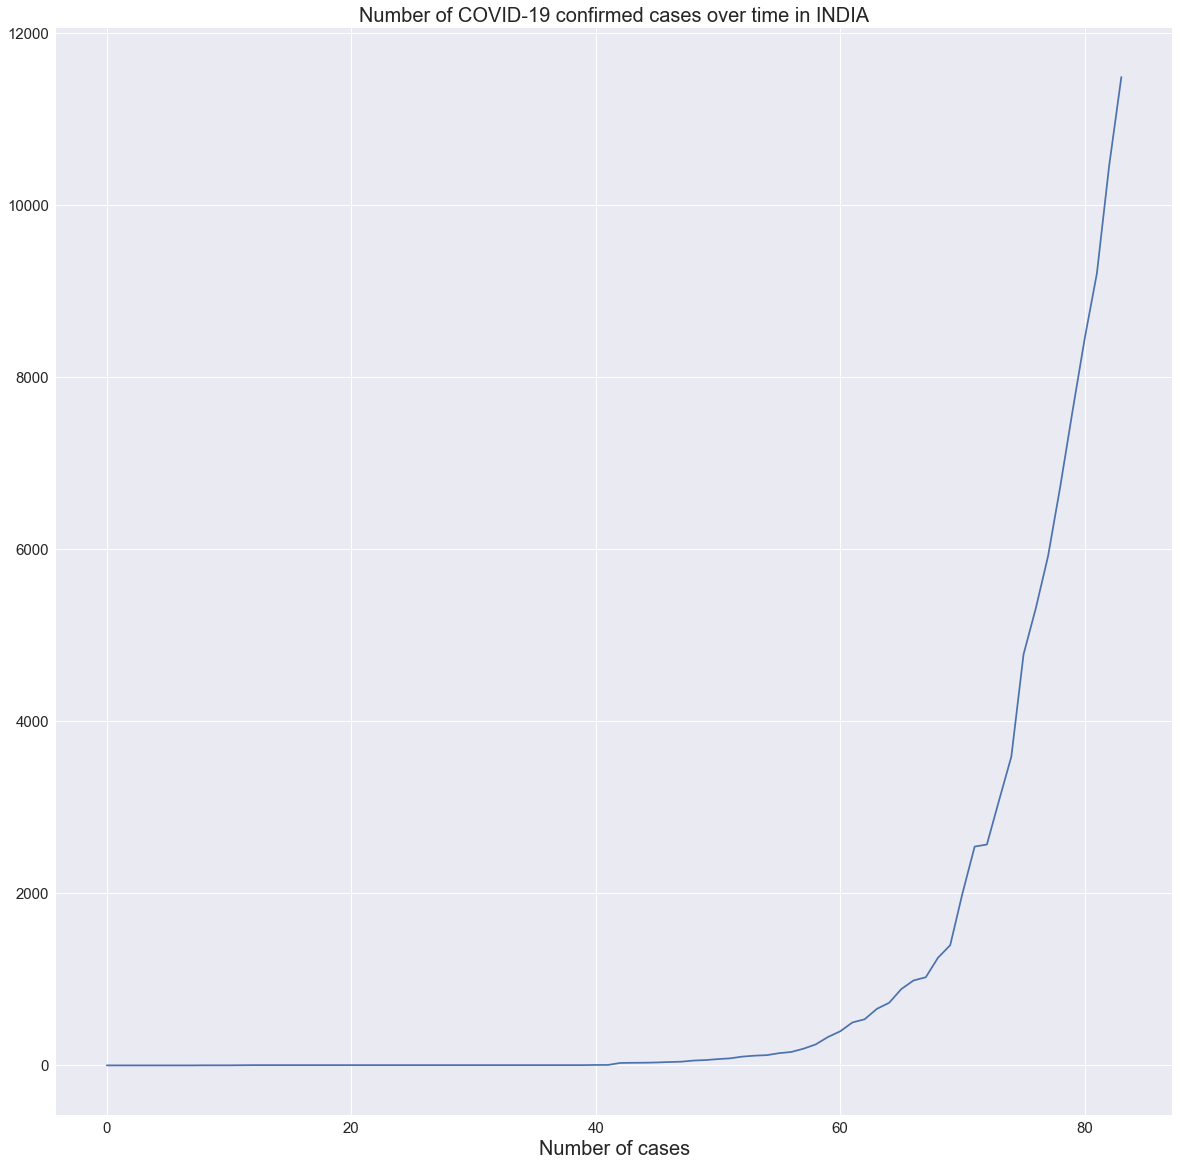

In [33]:
plt.figure(figsize=(20,20))
plt.plot(since_22_1,confirmed_India_cases)
plt.title('Number of COVID-19 confirmed cases over time in INDIA',size=20)
plt.xlabel('Days since_22_1',size=20)
plt.xlabel('Number of cases',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

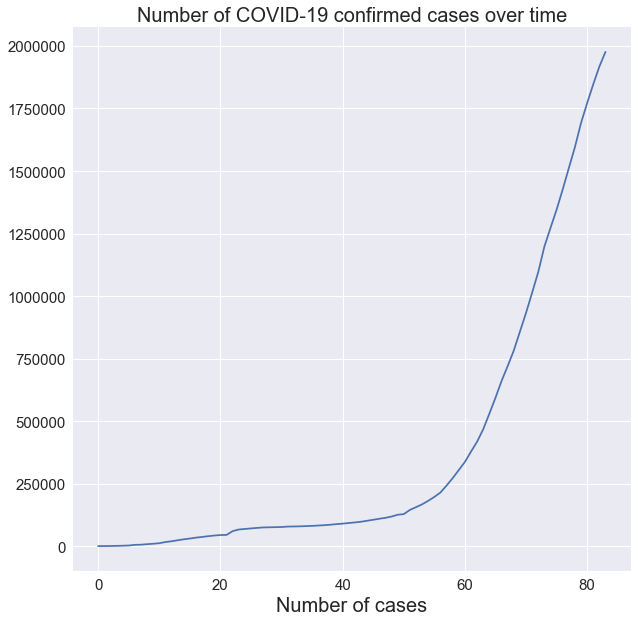

In [188]:
# total cases over time plot

plt.figure(figsize=(10,10))
plt.plot(adjusted_dates,world_cases)
plt.title('Number of COVID-19 confirmed cases over time',size=20)
plt.xlabel('Days since_22_1',size=20)
plt.xlabel('Number of cases',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [34]:
X_train=since_22_1
y_train=confirmed_India_cases
X_test = futureforcast



In [35]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

/Users/shivaneeprajapati/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [36]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

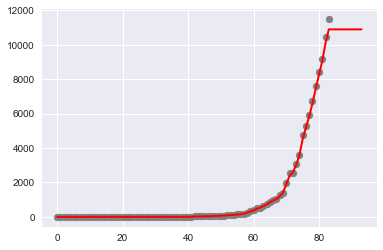

In [37]:
plt.scatter(X_train, y_train,  color='gray')
plt.plot(X_test, predictions, color='red', linewidth=2)
plt.show()